<a href="https://colab.research.google.com/github/Shubham8223/ML-projects/blob/KNN-and-visualization/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

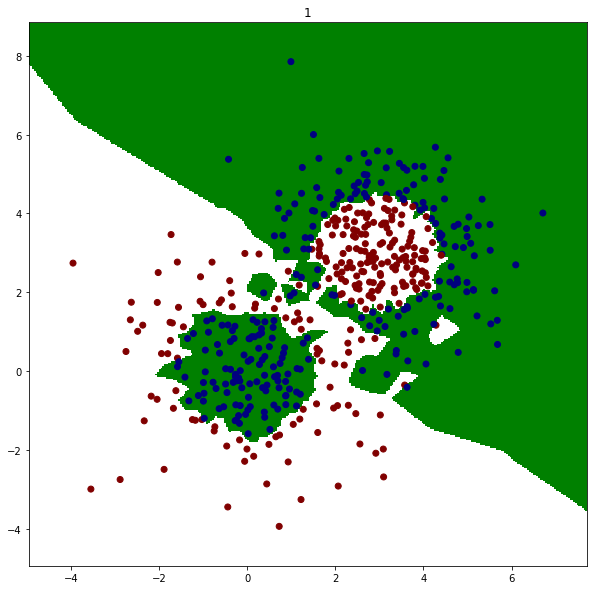

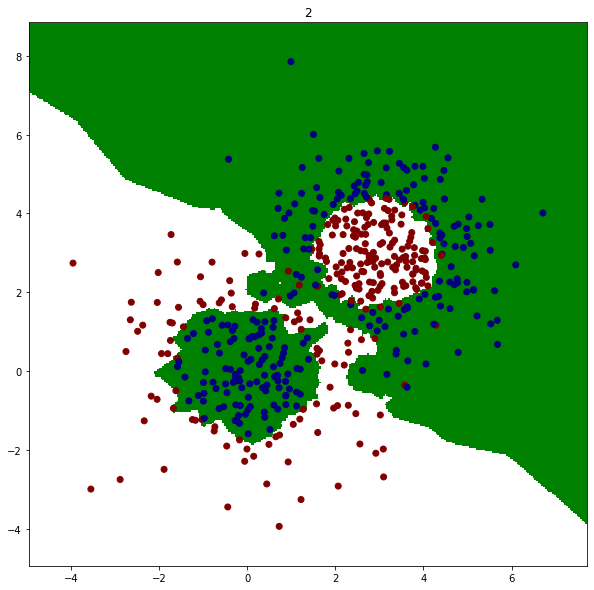

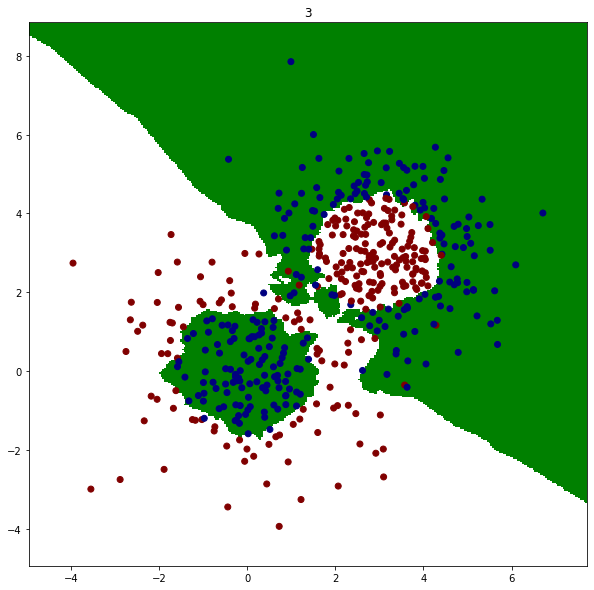

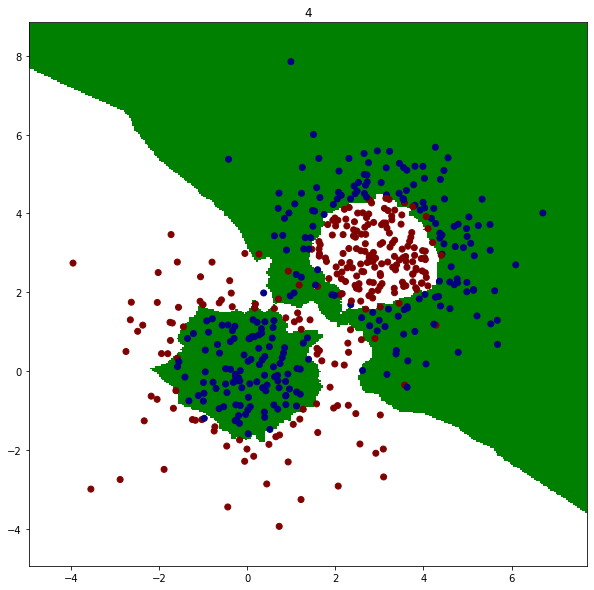

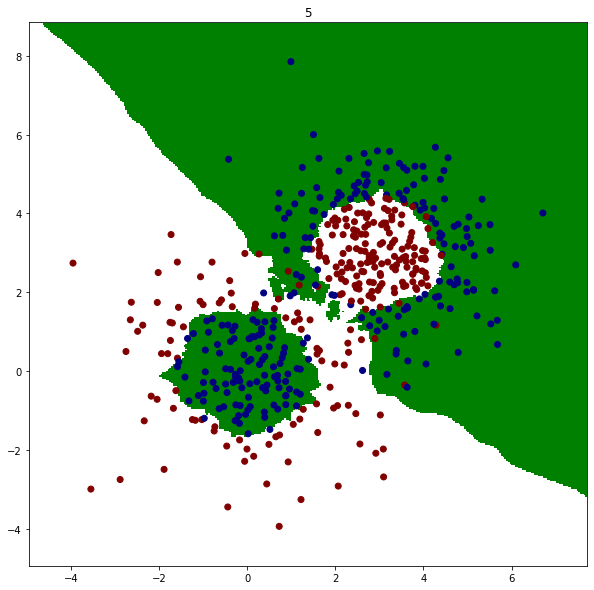

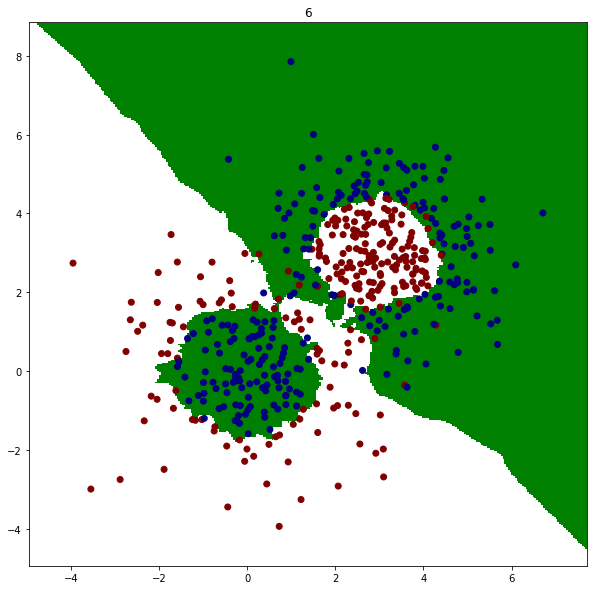

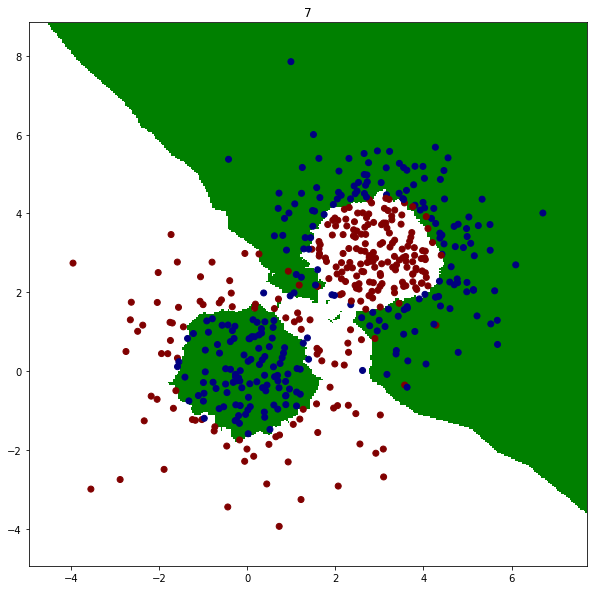

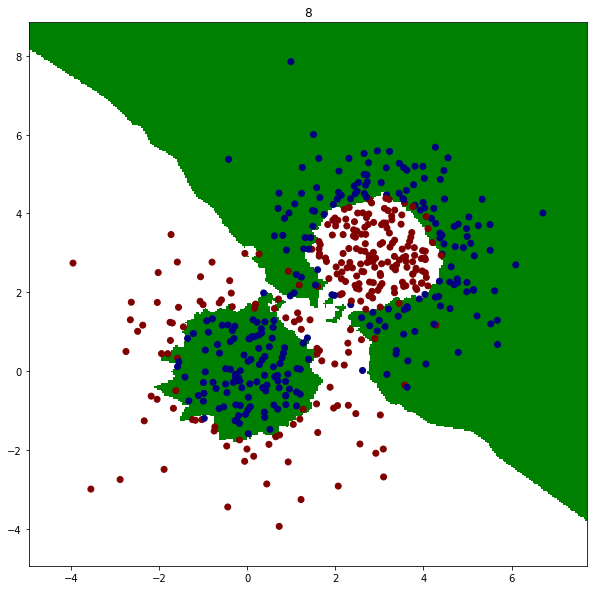

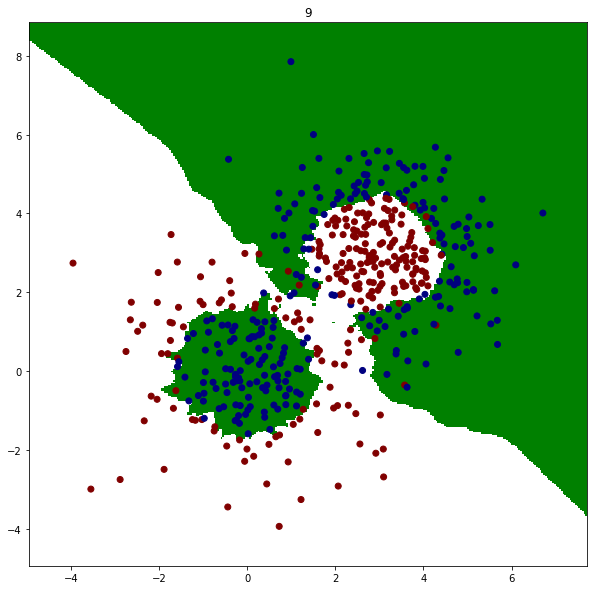

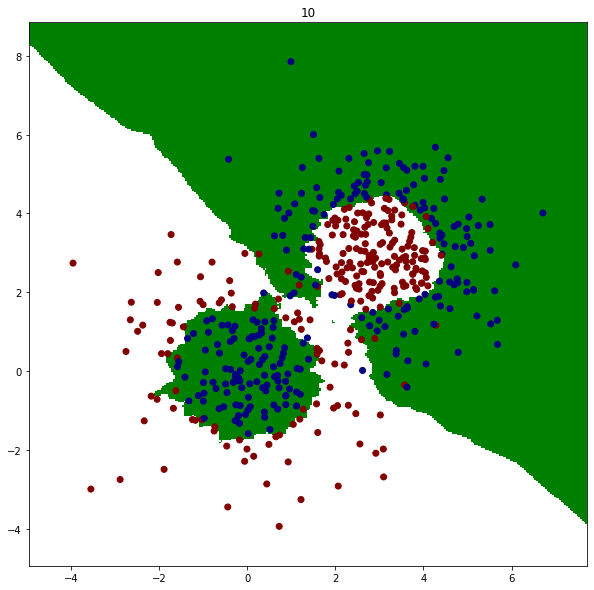

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as knn
def Knplotter(adr:str):
  s1=np.genfromtxt(adr,delimiter=',')
  X=s1[:,:2]
  x=X[:,0]
  y=X[:,1]
  cl=s1[:,2]
  xx,yy=np.meshgrid(np.arange(x.min()-1,y.max()+1,0.04),np.arange(y.min()-1,y.max()+1,0.04))
  for i in range(1,11):
      fi1=plt.figure(i,figsize=(10,10))
      k1=knn(i)
      k1.fit(X,cl)
      #_c converts to 2 d numpy array 
      z=k1.predict(np.c_[xx.ravel(),yy.ravel()])
      z=z.reshape(xx.shape)
      plt.title(i)
      plt.pcolormesh(xx,yy,z,cmap='ocean')
      plt.scatter(x,y,c=cl,cmap='jet')
      plt.xlim(x.min()-1,x.max()+1)
      plt.ylim(y.min()-1,y.max()+1)
  plt.show()
Knplotter('/content/3.concertriccir2.csv')



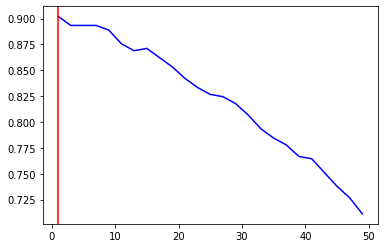

0.92


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import cross_val_score as cvs
from sklearn.metrics import accuracy_score as asc
dara=pd.read_csv('/content/3.concertriccir2.csv',names=['x','y','c'])
#2nd is for train in tts
X=np.array(dara[['x','y']])
y=np.array(dara['c'])
cvsl=[]
x_tr,x_test,y_tr,y_test=tts(X,y,test_size=0.1,random_state=0)
kfc=[x for x in range(1,51) if x%2!=0 ]
for i in kfc:
  k1=knn(i)
  cc=cvs(k1,x_tr,y_tr,cv=10,scoring='accuracy')
  cvsl.append(cc.mean())
bcv=kfc[np.argmax(cvsl)]
plt.plot(kfc,cvsl,'b')
plt.axvline(bcv,ymin=0,ymax=1,c='r')
plt.show()
k1=knn(bcv)
k1.fit(x_tr,y_tr)
pre=k1.predict(x_test)
ac=asc(pre,y_test)
print(ac)